In [1]:
import pandas as pd
from pandas import DataFrame as df
import random
import datetime

In [2]:
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

In [4]:
df1=pd.read_excel('cancer_data4.xlsx',sheet_name="DEMOGRAPHICS")
df2=pd.read_excel('cancer_data4.xlsx',sheet_name='REFERRAL')
df3=pd.read_excel('cancer_data4.xlsx',sheet_name='IMAGING')
df4=pd.read_excel('cancer_data4.xlsx',sheet_name='DIAGNOSIS')
df5=pd.read_excel('cancer_data4.xlsx',sheet_name='CANCER CARE PLAN')
df6=pd.read_excel('cancer_data4.xlsx',sheet_name='Staging')
df7=pd.read_excel('cancer_data4.xlsx',sheet_name='Surgery&other procedures')
df8=pd.read_excel('cancer_data4.xlsx',sheet_name='Pathology Details')
df9=pd.read_excel("cancer_data4.xlsx",sheet_name="chemotheropy & other drugs")

In [75]:
tmp1=df(df1.groupby(['statename','GENDER']).count()['NHS NUMBER'])
tmp1.reset_index(level=['statename','GENDER'],inplace=True)
tmp1.head()

,statename,GENDER,NHS NUMBER
0,KARNATAKA,F,64
1,KARNATAKA,M,59
2,KERALA,F,190
3,KERALA,M,156
4,TAMIL NADU,F,91


In [20]:
import seaborn as sns


In [1]:
fig,ax=plt.subplots(figsize=(11,10))
sns1=sns.barplot(x=tmp1.statename,y=tmp1['NHS NUMBER'],palette='husl',errwidth=0.5,hue=tmp1['GENDER'])
sns1.set_xlabel('STATENAME')
sns1.set_ylabel("Numner of Patients")

SyntaxError: keyword argument repeated (<ipython-input-1-909ca72e2910>, line 2)

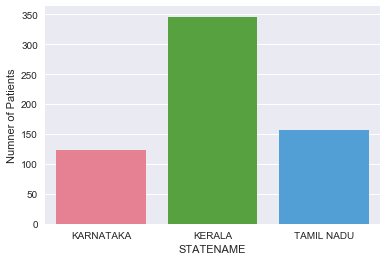

<IPython.core.display.Javascript object>


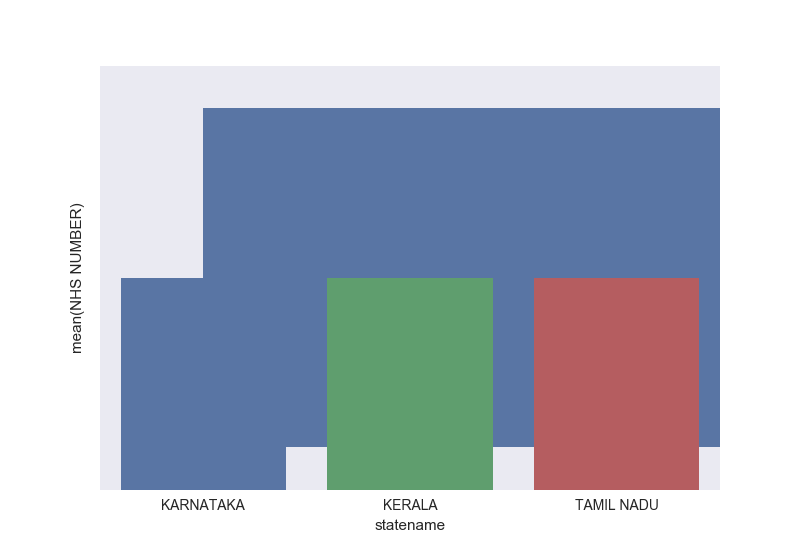

In [30]:
fig,axs=plt.subplots()

In [6]:
tmp22=pd.read_excel('cancer_data4.xlsx',index_col="REFERRAL_REQUEST_RECEIVED_DATE_DF",sheet_name='REFERRAL')

C:\Users\sandip\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


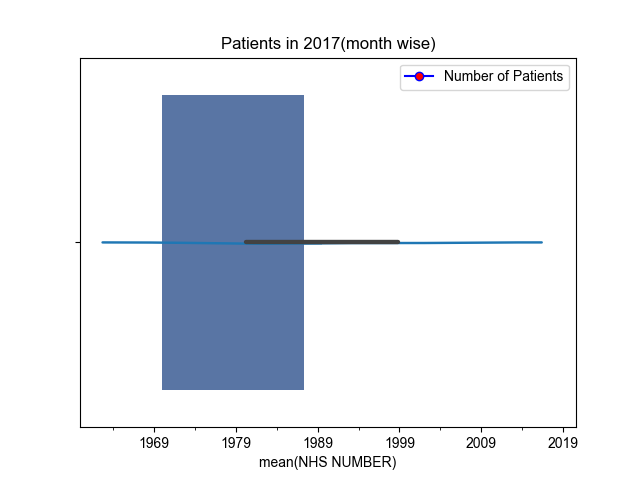

In [11]:
g1=tmp22['LOCAL_PATIENT_IDENTIFIER'].groupby(pd.TimeGrouper("m")).count()
g1.plot(kind='line',legend=True,marker="o",color="b",label='Number of Patients',markerfacecolor='r')
plt.title("Patients in 2017(month wise)")


In [6]:
df8.head()

,LOCAL_PATIENT_IDENTIFIER,PATHOLOGY INVESTIGATION TYPE,SAMPLE RECEIPT DATE,INVESTIGATION RESULT DATE,CONSULTANT CODE (PATHOLOGIST),ORGANISATION CODE (OF REPORTING PATHOLOGY),PRIMARY DIAGNOSIS (ICD),TUMOUR LATERALITY,INVASIVE LESION SIZE,SYNCHRONOUS TUMOUR INDICATOR,HISTOLOGY (SNOMED),GRADE OF DIFFERENTIATION,CANCER VASCULAR OR LYMPHATIC INVASION,EXCISION MARGIN,NODES EXAMINED NUMBER,NODES POSITIVE NUMBER
0,L_CPP100,CY_Cytology,2017-02-23 13:37:09,2017-03-08 17:37:09,GMP-DR_PT2,MCCT,ICD4,L_Left,4.1-6.0,"Y_Yes, synchronous tumours present",P,G1_Well differentiated,"Y_Yes, vascular/lymphatic invasion present",05_Tumour reaches tumour margin,7,3
1,R_CPP101,BX_Biopsy,2017-02-23 01:06:57,2017-03-09 09:06:57,GMP-DR_PT1,MCCT,ICD7,L_Left,6.1-8.0,"Y_Yes, synchronous tumours present",P,G1_Well differentiated,U_Uncertain whether vascular invasion is prese...,01_Excision margins are clear (distance from m...,15,3
2,L_CPP102,BX_Biopsy,2017-03-10 17:13:24,2017-03-25 18:13:24,GMP-DR_PT1,MCCT,ICD5,L_Left,2.1-4.0,"Y_Yes, synchronous tumours present",M,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",03_Excision margins are clear (tumour >1mm but...,6,2
3,L_CPP103,CY_Cytology,2017-02-22 20:48:52,2017-03-09 22:48:52,GMP-DR_PT2,MCCT,ICD3,R_Right,2.9,"Y_Yes, synchronous tumours present",P,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",01_Excision margins are clear (distance from m...,14,2
4,L_CPP104,BX_Biopsy,2017-02-25 05:11:12,2017-03-12 10:11:12,GMP-DR_PT1,MCCT,ICD1,L_Left,6.1-8.0,"N_No, no synchronous tumours present",P,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",01_Excision margins are clear (distance from m...,9,2


In [7]:
writer = pd.ExcelWriter('cancer_data4.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name="DEMOGRAPHICS",index=None)
df2.to_excel(writer,sheet_name='REFERRAL',index=None)
df3.to_excel(writer,sheet_name='IMAGING',index=None)
df4.to_excel(writer,sheet_name='DIAGNOSIS',index=None)
df5.to_excel(writer,sheet_name='CANCER CARE PLAN',index=None)
df6.to_excel(writer,sheet_name='Staging',index=None)
df7.to_excel(writer,sheet_name='Surgery&other procedures',index=None)
df8.to_excel(writer,sheet_name='Pathology Details',index=None)
writer.save()

In [10]:
lst=["TNM TYPE = 1, CANCER STAGING TYPE = 2","TNM TYPE = 1, CANCER STAGING TYPE = 2","-"]


In [11]:
df8['T CATEGORY (PATHOLOGICAL)']=df8.apply(lambda x:lst[random.randint(0,2)],axis=1)

In [13]:
lst=["TNM TYPE = 2, CANCER STAGING TYPE = 2","-"]

In [14]:
def fun1(x):
    if str(x['T CATEGORY (PATHOLOGICAL)']).startswith("-"):
        return "TNM TYPE = 2, CANCER STAGING TYPE = 2"
    else:
        return lst[random.randint(0,1)]

In [15]:
df8['N CATEGORY (PATHOLOGICAL)']=df8.apply(fun1,axis=1)

In [19]:
lst=["TNM TYPE = 3, CANCER STAGING TYPE = 2","-"]

In [20]:
df8['M CATEGORY (PATHOLOGICAL)']=df8.apply(lambda x:lst[random.randint(0,1)],axis=1)

In [22]:
df8['TNM CATEGORY (PATHOLOGICAL)']=df8.apply(lambda x:"TNM TYPE = 4, CANCER STAGING TYPE = 2",axis=1)

In [24]:
df8.head()

,LOCAL_PATIENT_IDENTIFIER,PATHOLOGY INVESTIGATION TYPE,SAMPLE RECEIPT DATE,INVESTIGATION RESULT DATE,CONSULTANT CODE (PATHOLOGIST),ORGANISATION CODE (OF REPORTING PATHOLOGY),PRIMARY DIAGNOSIS (ICD),TUMOUR LATERALITY,INVASIVE LESION SIZE,SYNCHRONOUS TUMOUR INDICATOR,HISTOLOGY (SNOMED),GRADE OF DIFFERENTIATION,CANCER VASCULAR OR LYMPHATIC INVASION,EXCISION MARGIN,NODES EXAMINED NUMBER,NODES POSITIVE NUMBER,T CATEGORY (PATHOLOGICAL),N CATEGORY (PATHOLOGICAL),M CATEGORY (PATHOLOGICAL),TNM CATEGORY (PATHOLOGICAL)
0,L_CPP100,CY_Cytology,2017-02-23 13:37:09,2017-03-08 17:37:09,GMP-DR_PT2,MCCT,ICD4,L_Left,4.1-6.0,"Y_Yes, synchronous tumours present",P,G1_Well differentiated,"Y_Yes, vascular/lymphatic invasion present",05_Tumour reaches tumour margin,7,3,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2","TNM TYPE = 3, CANCER STAGING TYPE = 2","TNM TYPE = 4, CANCER STAGING TYPE = 2"
1,R_CPP101,BX_Biopsy,2017-02-23 01:06:57,2017-03-09 09:06:57,GMP-DR_PT1,MCCT,ICD7,L_Left,6.1-8.0,"Y_Yes, synchronous tumours present",P,G1_Well differentiated,U_Uncertain whether vascular invasion is prese...,01_Excision margins are clear (distance from m...,15,3,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2",-,"TNM TYPE = 4, CANCER STAGING TYPE = 2"
2,L_CPP102,BX_Biopsy,2017-03-10 17:13:24,2017-03-25 18:13:24,GMP-DR_PT1,MCCT,ICD5,L_Left,2.1-4.0,"Y_Yes, synchronous tumours present",M,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",03_Excision margins are clear (tumour >1mm but...,6,2,"TNM TYPE = 1, CANCER STAGING TYPE = 2",-,-,"TNM TYPE = 4, CANCER STAGING TYPE = 2"
3,L_CPP103,CY_Cytology,2017-02-22 20:48:52,2017-03-09 22:48:52,GMP-DR_PT2,MCCT,ICD3,R_Right,2.9,"Y_Yes, synchronous tumours present",P,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",01_Excision margins are clear (distance from m...,14,2,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2","TNM TYPE = 3, CANCER STAGING TYPE = 2","TNM TYPE = 4, CANCER STAGING TYPE = 2"
4,L_CPP104,BX_Biopsy,2017-02-25 05:11:12,2017-03-12 10:11:12,GMP-DR_PT1,MCCT,ICD1,L_Left,6.1-8.0,"N_No, no synchronous tumours present",P,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",01_Excision margins are clear (distance from m...,9,2,"TNM TYPE = 1, CANCER STAGING TYPE = 2","TNM TYPE = 2, CANCER STAGING TYPE = 2","TNM TYPE = 3, CANCER STAGING TYPE = 2","TNM TYPE = 4, CANCER STAGING TYPE = 2"


In [ ]:
def fun2(x):
    

In [26]:
df8['SERVICE REPORT IDENTIFIER']=df8.apply(lambda x:str(x['LOCAL_PATIENT_IDENTIFIER']).replace("CPP","SRI")+"_MCC",axis=1)

In [27]:
df8.head()

,LOCAL_PATIENT_IDENTIFIER,PATHOLOGY INVESTIGATION TYPE,SAMPLE RECEIPT DATE,INVESTIGATION RESULT DATE,CONSULTANT CODE (PATHOLOGIST),ORGANISATION CODE (OF REPORTING PATHOLOGY),PRIMARY DIAGNOSIS (ICD),TUMOUR LATERALITY,INVASIVE LESION SIZE,SYNCHRONOUS TUMOUR INDICATOR,...,GRADE OF DIFFERENTIATION,CANCER VASCULAR OR LYMPHATIC INVASION,EXCISION MARGIN,NODES EXAMINED NUMBER,NODES POSITIVE NUMBER,T CATEGORY (PATHOLOGICAL),N CATEGORY (PATHOLOGICAL),M CATEGORY (PATHOLOGICAL),TNM CATEGORY (PATHOLOGICAL),SERVICE REPORT IDENTIFIER
0,L_CPP100,CY_Cytology,2017-02-23 13:37:09,2017-03-08 17:37:09,GMP-DR_PT2,MCCT,ICD4,L_Left,4.1-6.0,"Y_Yes, synchronous tumours present",...,G1_Well differentiated,"Y_Yes, vascular/lymphatic invasion present",05_Tumour reaches tumour margin,7,3,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2","TNM TYPE = 3, CANCER STAGING TYPE = 2","TNM TYPE = 4, CANCER STAGING TYPE = 2",L_SRI100_MCC
1,R_CPP101,BX_Biopsy,2017-02-23 01:06:57,2017-03-09 09:06:57,GMP-DR_PT1,MCCT,ICD7,L_Left,6.1-8.0,"Y_Yes, synchronous tumours present",...,G1_Well differentiated,U_Uncertain whether vascular invasion is prese...,01_Excision margins are clear (distance from m...,15,3,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2",-,"TNM TYPE = 4, CANCER STAGING TYPE = 2",R_SRI101_MCC
2,L_CPP102,BX_Biopsy,2017-03-10 17:13:24,2017-03-25 18:13:24,GMP-DR_PT1,MCCT,ICD5,L_Left,2.1-4.0,"Y_Yes, synchronous tumours present",...,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",03_Excision margins are clear (tumour >1mm but...,6,2,"TNM TYPE = 1, CANCER STAGING TYPE = 2",-,-,"TNM TYPE = 4, CANCER STAGING TYPE = 2",L_SRI102_MCC
3,L_CPP103,CY_Cytology,2017-02-22 20:48:52,2017-03-09 22:48:52,GMP-DR_PT2,MCCT,ICD3,R_Right,2.9,"Y_Yes, synchronous tumours present",...,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",01_Excision margins are clear (distance from m...,14,2,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2","TNM TYPE = 3, CANCER STAGING TYPE = 2","TNM TYPE = 4, CANCER STAGING TYPE = 2",L_SRI103_MCC
4,L_CPP104,BX_Biopsy,2017-02-25 05:11:12,2017-03-12 10:11:12,GMP-DR_PT1,MCCT,ICD1,L_Left,6.1-8.0,"N_No, no synchronous tumours present",...,GX_Grade of differentiation is not appropriate...,"N_No, vascular/lymphatic invasion not present",01_Excision margins are clear (distance from m...,9,2,"TNM TYPE = 1, CANCER STAGING TYPE = 2","TNM TYPE = 2, CANCER STAGING TYPE = 2","TNM TYPE = 3, CANCER STAGING TYPE = 2","TNM TYPE = 4, CANCER STAGING TYPE = 2",L_SRI104_MCC


In [28]:
lst=["1_Final (complete)",
"2_Preliminary (Interim)",
"3_Test not available",
"4_Unspecified",
"5_Supplementary/second opinion"
]

In [31]:
df8['SERVICE REPORT STATUS']=df8.apply(lambda x:lst[random.randint(0,4)],axis=1)

In [33]:
lst=["4_Nodes",
"2_ Re-excision of primary tumour",
"3_Recurrence",
"1_Primary tumour",
"9_Not known",
"5_Metastatic site other than nodes"
]

In [34]:
df8['SPECIMEN NATURE']=df8.apply(lambda x:lst[random.randint(0,5)],axis=1)

In [36]:
writer = pd.ExcelWriter('cancer_data4.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name="DEMOGRAPHICS",index=None)
df2.to_excel(writer,sheet_name='REFERRAL',index=None)
df3.to_excel(writer,sheet_name='IMAGING',index=None)
df4.to_excel(writer,sheet_name='DIAGNOSIS',index=None)
df5.to_excel(writer,sheet_name='CANCER CARE PLAN',index=None)
df6.to_excel(writer,sheet_name='Staging',index=None)
df7.to_excel(writer,sheet_name='Surgery&other procedures',index=None)
df8.to_excel(writer,sheet_name='Pathology Details',index=None)
writer.save()

In [38]:
df6["T CATEGORY (FINAL PRETREATMENT)"]=df8['T CATEGORY (PATHOLOGICAL)']

In [40]:
df6['STAGING CERTAINTY FACTOR (T CATEGORY)']=df6.apply(lambda x:"Tumour component" if str(x["T CATEGORY (FINAL PRETREATMENT)"]).startswith("TNM TYPE = 1, CANCER STAGING TYPE = 2") else "-",axis=1)

In [42]:
df6['N CATEGORY (FINAL PRETREATMENT)']=df8['N CATEGORY (PATHOLOGICAL)']

In [44]:
df6['STAGING CERTAINTY FACTOR (N CATEGORY)']=df6.apply(lambda x:"Node component" if str(x["N CATEGORY (FINAL PRETREATMENT)"]).startswith("TNM TYPE = 2, CANCER STAGING TYPE = 2") else "-",axis=1)

In [49]:
df6['M CATEGORY (FINAL PRETREATMENT)']=df8['M CATEGORY (PATHOLOGICAL)']

In [51]:
df6['STAGING CERTAINTY FACTOR (M CATEGORY)']=df6.apply(lambda x:"Metastasis component" if str(x["M CATEGORY (FINAL PRETREATMENT)"]).startswith("TNM TYPE = 3, CANCER STAGING TYPE = 2") else "-",axis=1)

In [53]:
lst=['TNM TYPE = 4, CANCER STAGING TYPE = 1','TNM TYPE = 4, CANCER STAGING TYPE = 1',"-"]

In [54]:
df6['TNM CATEGORY (FINAL PRETREATMENT)']=df6.apply(lambda x:lst[random.randint(0,2)],axis=1)

In [56]:
df6['STAGING CERTAINTY FACTOR (TNM CATEGORY)']=df6.apply(lambda x:"Overall TNM stage" if str(x["TNM CATEGORY (FINAL PRETREATMENT)"]).startswith("TNM TYPE = 4, CANCER STAGING TYPE = 1") else "-",axis=1)

In [58]:
lst=["1_Nottingham Prognostic Index (Breast)",
"3_Limited disease or Extensive disease (Small Cell Lung Cancer)",
"3_Limited disease or Extensive disease (Small Cell Lung Cancer)",
"4_FIGO - Federation Internationale de Gynecologie Obstetrique (Gynaecological)",
"2_Dukes (Colorectal)"
]

In [59]:
df6['SITE SPECIFIC STAGING CLASSIFICATION']=df6.apply(lambda x:lst[random.randint(0,4)],axis=1 )

In [60]:
df6.head()

,LOCAL_PATIENT_IDENTIFIER,T CATEGORY (FINAL PRETREATMENT),STAGING CERTAINTY FACTOR (T CATEGORY),N CATEGORY (FINAL PRETREATMENT),STAGING CERTAINTY FACTOR (N CATEGORY),M CATEGORY (FINAL PRETREATMENT),STAGING CERTAINTY FACTOR (M CATEGORY),TNM CATEGORY (FINAL PRETREATMENT),STAGING CERTAINTY FACTOR (TNM CATEGORY),SITE SPECIFIC STAGING CLASSIFICATION
0,L_CPP100,-,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2",Node component,"TNM TYPE = 3, CANCER STAGING TYPE = 2",Metastasis component,"TNM TYPE = 4, CANCER STAGING TYPE = 1",Overall TNM stage,2_Dukes (Colorectal)
1,R_CPP101,-,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2",Node component,-,-,-,-,4_FIGO - Federation Internationale de Gynecolo...
2,L_CPP102,"TNM TYPE = 1, CANCER STAGING TYPE = 2",Tumour component,-,-,-,-,"TNM TYPE = 4, CANCER STAGING TYPE = 1",Overall TNM stage,1_Nottingham Prognostic Index (Breast)
3,L_CPP103,-,-,"TNM TYPE = 2, CANCER STAGING TYPE = 2",Node component,"TNM TYPE = 3, CANCER STAGING TYPE = 2",Metastasis component,-,-,4_FIGO - Federation Internationale de Gynecolo...
4,L_CPP104,"TNM TYPE = 1, CANCER STAGING TYPE = 2",Tumour component,"TNM TYPE = 2, CANCER STAGING TYPE = 2",Node component,"TNM TYPE = 3, CANCER STAGING TYPE = 2",Metastasis component,"TNM TYPE = 4, CANCER STAGING TYPE = 1",Overall TNM stage,4_FIGO - Federation Internationale de Gynecolo...


In [64]:
lst=["TNM TYPE = 1, CANCER STAGING TYPE = 1","TNM TYPE = 1, CANCER STAGING TYPE = 1","-"]

In [65]:
df6['TNM CATEGORY (INTEGRATED)']=df6.apply(lambda x:lst[random.randint(0,2)],axis=1)

In [68]:
lst=["TNM TYPE = 1, CANCER STAGING TYPE = 3","TNM TYPE = 1, CANCER STAGING TYPE = 3","-"]

In [69]:
df6['T CATEGORY (INTEGRATED STAGE)']=df6.apply(lambda x:lst[random.randint(0,2)],axis=1)

In [72]:
lst=["TNM TYPE = 2, CANCER STAGING TYPE = 3","TNM TYPE = 2, CANCER STAGING TYPE = 3","-"]

In [73]:
df6['N CATEGORY (INTEGRATED STAGE)']=df6.apply(lambda x:lst[random.randint(0,2)],axis=1)

In [75]:
lst=["TNM TYPE = 3, CANCER STAGING TYPE = 3","TNM TYPE = 3, CANCER STAGING TYPE = 3","-"]

In [76]:
df6['M CATEGORY (INTEGRATED STAGE)']=df6.apply(lambda x:lst[random.randint(0,2)],axis=1)

In [78]:
df8["TNM CATEGORY (PATHOLOGICAL)"]=df6['TNM CATEGORY (FINAL PRETREATMENT)']

In [79]:
writer = pd.ExcelWriter('cancer_data4.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name="DEMOGRAPHICS",index=None)
df2.to_excel(writer,sheet_name='REFERRAL',index=None)
df3.to_excel(writer,sheet_name='IMAGING',index=None)
df4.to_excel(writer,sheet_name='DIAGNOSIS',index=None)
df5.to_excel(writer,sheet_name='CANCER CARE PLAN',index=None)
df6.to_excel(writer,sheet_name='Staging',index=None)
df7.to_excel(writer,sheet_name='Surgery&other procedures',index=None)
df8.to_excel(writer,sheet_name='Pathology Details',index=None)
writer.save()

In [93]:
df9=pd.concat([df7[['LOCAL_PATIENT_IDENTIFIER','SITE CODE (OF SURGERY)',"CONSULTANT_CODE","MAIN_SPECIALITY_CODE"]],df5['CARE PLAN AGREED DATE']],axis=1)

In [95]:
#df9.rename(columns={"CARE PLAN AGREED DATE":"DECISION TO TREAT DATE (ANTI-CANCER DRUG REGIMEN)"},inplace=True)

In [98]:
lst=["C_Chemotherapy",
"C_Chemotherapy",
"I_Immunotherapy",
"O_Other",
"H_Hormone / endocrine therapy"
]

In [102]:
df9['DRUG THERAPY TYPE']=df9.apply(lambda x:lst[random.randint(0,4)],axis=1)

In [104]:
lst=["A_Adjuvent",
"N_Neoadjuvent",
"C_Curative",
"P_Palliative",
"N_Neoadjuvent"
]

In [105]:
df9['DRUG TREATMENT INTENT']=df9.apply(lambda x:lst[random.randint(0,4)],axis=1)

In [106]:
df9.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF SURGERY),CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DECISION TO TREAT DATE (ANTI-CANCER DRUG REGIMEN),DRUG THERAPY TYPE,DRUG TREATMENT INTENT
0,L_CPP100,L_SPP100 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-22 12:37:09,C_Chemotherapy,N_Neoadjuvent
1,R_CPP101,R_SPP101 MCC,GMP-DR4,824_HISTOPATHOLOGY,2017-02-22 00:06:57,I_Immunotherapy,C_Curative
2,L_CPP102,L_SPP102 MCC,GMP-DR3,823_HAEMATOLOGY,2017-03-09 16:13:24,I_Immunotherapy,C_Curative
3,L_CPP103,L_SPP103 MCC,GMP-DR1,370_MEDICAL ONCOLOGY,2017-02-21 19:48:52,O_Other,C_Curative
4,L_CPP104,L_SPP104 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-24 04:11:12,H_Hormone / endocrine therapy,N_Neoadjuvent


In [108]:
lst=["CMF_Cyclophosphamide, Methotrexate & 5-Fluorouracil"
,"AC_Dorubicin and Cyclophosphamide"]

In [110]:
df9['DRUG REGIMEN ACRONYM']=df9.apply(lambda x:lst[random.randint(0,1)],axis=1)

In [112]:
df9["START DATE (ANTI-CANCER DRUG REGIMEN)"]=df9.apply(lambda x:x['DECISION TO TREAT DATE (ANTI-CANCER DRUG REGIMEN)']+datetime.timedelta(days=random.randint(2,3),hours=random.randint(1,11)),axis=1)

TypeError: range() integer end argument expected, got float.

In [118]:
df9['RECORDED HEIGHT (CANCER DRUG TREATMENT)']=df9.apply(lambda x:random.uniform(5.10,6.21),axis=1)

In [121]:
df9['RECORDED WEIGHT (CANCER DRUG TREATMENT)']=df9.apply(lambda x:random.randint(40,78),axis=1)

In [122]:
df9.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF SURGERY),CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DECISION TO TREAT DATE (ANTI-CANCER DRUG REGIMEN),DRUG THERAPY TYPE,DRUG TREATMENT INTENT,DRUG REGIMEN ACRONYM,START DATE (ANTI-CANCER DRUG REGIMEN),RECORDED HEIGHT (CANCER DRUG TREATMENT),RECORDED WEIGHT (CANCER DRUG TREATMENT)
0,L_CPP100,L_SPP100 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-22 12:37:09,C_Chemotherapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-24 16:37:09,5.285020,40
1,R_CPP101,R_SPP101 MCC,GMP-DR4,824_HISTOPATHOLOGY,2017-02-22 00:06:57,I_Immunotherapy,C_Curative,"CMF_Cyclophosphamide, Methotrexate & 5-Fluorou...",2017-02-24 03:06:57,5.563935,40
2,L_CPP102,L_SPP102 MCC,GMP-DR3,823_HAEMATOLOGY,2017-03-09 16:13:24,I_Immunotherapy,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-03-11 18:13:24,5.531317,49
3,L_CPP103,L_SPP103 MCC,GMP-DR1,370_MEDICAL ONCOLOGY,2017-02-21 19:48:52,O_Other,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-02-23 20:48:52,5.643126,62
4,L_CPP104,L_SPP104 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-24 04:11:12,H_Hormone / endocrine therapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-26 14:11:12,6.027736,68


In [133]:
df9.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF SURGERY),CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DECISION TO TREAT DATE (ANTI-CANCER DRUG REGIMEN),DRUG THERAPY TYPE,DRUG TREATMENT INTENT,DRUG REGIMEN ACRONYM,START DATE (ANTI-CANCER DRUG REGIMEN),RECORDED HEIGHT (CANCER DRUG TREATMENT),RECORDED WEIGHT (CANCER DRUG TREATMENT),PERSON BODY SURFACE AREA (PRETREATMENT),CREATININE CLEARANCE
0,L_CPP100,L_SPP100 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-22 12:37:09,C_Chemotherapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-24 16:37:09,5.285020,40,1.496118,56mL/min
1,R_CPP101,R_SPP101 MCC,GMP-DR4,824_HISTOPATHOLOGY,2017-02-22 00:06:57,I_Immunotherapy,C_Curative,"CMF_Cyclophosphamide, Methotrexate & 5-Fluorou...",2017-02-24 03:06:57,5.563935,40,1.552956,130mL/min
2,L_CPP102,L_SPP102 MCC,GMP-DR3,823_HAEMATOLOGY,2017-03-09 16:13:24,I_Immunotherapy,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-03-11 18:13:24,5.531317,49,1.685643,82mL/min
3,L_CPP103,L_SPP103 MCC,GMP-DR1,370_MEDICAL ONCOLOGY,2017-02-21 19:48:52,O_Other,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-02-23 20:48:52,5.643126,62,1.890166,85mL/min
4,L_CPP104,L_SPP104 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-24 04:11:12,H_Hormone / endocrine therapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-26 14:11:12,6.027736,68,2.062100,116mL/min


In [128]:
df9['PERSON BODY SURFACE AREA (PRETREATMENT)']=df9.apply(lambda x: 0.09330 *(x['RECORDED HEIGHT (CANCER DRUG TREATMENT)']**0.725)*(x['RECORDED WEIGHT (CANCER DRUG TREATMENT)']**0.425),axis=1)

In [131]:
df9['CREATININE CLEARANCE']=df9.apply(lambda x: str(random.randint(56,131))+"mL/min",axis=1)

In [134]:
df9["START DATE (ANTI-CANCER DRUG FRACTION)"]=df9["START DATE (ANTI-CANCER DRUG REGIMEN)"]

In [135]:
df9.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF SURGERY),CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DECISION TO TREAT DATE (ANTI-CANCER DRUG REGIMEN),DRUG THERAPY TYPE,DRUG TREATMENT INTENT,DRUG REGIMEN ACRONYM,START DATE (ANTI-CANCER DRUG REGIMEN),RECORDED HEIGHT (CANCER DRUG TREATMENT),RECORDED WEIGHT (CANCER DRUG TREATMENT),PERSON BODY SURFACE AREA (PRETREATMENT),CREATININE CLEARANCE,START DATE (ANTI-CANCER DRUG FRACTION)
0,L_CPP100,L_SPP100 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-22 12:37:09,C_Chemotherapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-24 16:37:09,5.285020,40,1.496118,56mL/min,2017-02-24 16:37:09
1,R_CPP101,R_SPP101 MCC,GMP-DR4,824_HISTOPATHOLOGY,2017-02-22 00:06:57,I_Immunotherapy,C_Curative,"CMF_Cyclophosphamide, Methotrexate & 5-Fluorou...",2017-02-24 03:06:57,5.563935,40,1.552956,130mL/min,2017-02-24 03:06:57
2,L_CPP102,L_SPP102 MCC,GMP-DR3,823_HAEMATOLOGY,2017-03-09 16:13:24,I_Immunotherapy,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-03-11 18:13:24,5.531317,49,1.685643,82mL/min,2017-03-11 18:13:24
3,L_CPP103,L_SPP103 MCC,GMP-DR1,370_MEDICAL ONCOLOGY,2017-02-21 19:48:52,O_Other,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-02-23 20:48:52,5.643126,62,1.890166,85mL/min,2017-02-23 20:48:52
4,L_CPP104,L_SPP104 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-24 04:11:12,H_Hormone / endocrine therapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-26 14:11:12,6.027736,68,2.062100,116mL/min,2017-02-26 14:11:12


In [136]:
df9['ANTI-CANCER DRUG CYCLE IDENTIFIER']=df9.apply(lambda x: str(x['LOCAL_PATIENT_IDENTIFIER']).replace("C","CHM"),axis=1)

In [139]:
lst=[15,30]

In [140]:
df9['temp']=df9.apply(lambda x:x['START DATE (ANTI-CANCER DRUG FRACTION)']+datetime.timedelta(days=lst[random.randint(0,1)]) ,axis=1)

In [6]:
df9['DAY NUMBER (ANTI-CANCER DRUG CYCLE)']=df9.apply(lambda x:str(x['temp']-x['START DATE (ANTI-CANCER DRUG FRACTION)']),axis=1)


In [38]:
writer = pd.ExcelWriter('cancer_data4.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name="DEMOGRAPHICS",index=None)
df2.to_excel(writer,sheet_name='REFERRAL',index=None)
df3.to_excel(writer,sheet_name='IMAGING',index=None)
df4.to_excel(writer,sheet_name='DIAGNOSIS',index=None)
df5.to_excel(writer,sheet_name='CANCER CARE PLAN',index=None)
df6.to_excel(writer,sheet_name='Staging',index=None)
df7.to_excel(writer,sheet_name='Surgery&other procedures',index=None)
df8.to_excel(writer,sheet_name='Pathology Details',index=None)
df9.to_excel(writer,sheet_name='chemotheropy & other drugs',index=None)
writer.save()

In [13]:
df9['DURATION OF ANTI-CANCER DRUG CYCLE']=df9.apply(lambda x:x["DAY NUMBER (ANTI-CANCER DRUG CYCLE)"].replace("00:00:00",""),axis=1)

In [ ]:
datetime.datetime.date()

In [26]:
df9['DAY NUMBER (ANTI-CANCER DRUG CYCLE)']=df9.apply(lambda x:str(x['DURATION OF ANTI-CANCER DRUG CYCLE'])+str(x['temp']),axis=1)

In [29]:
df9.drop(columns=['temp','temp2'],axis=1,inplace=True)

In [30]:
df9.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF SURGERY),CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DECISION TO TREAT DATE (ANTI-CANCER DRUG REGIMEN),DRUG THERAPY TYPE,DRUG TREATMENT INTENT,DRUG REGIMEN ACRONYM,START DATE (ANTI-CANCER DRUG REGIMEN),RECORDED HEIGHT (CANCER DRUG TREATMENT),RECORDED WEIGHT (CANCER DRUG TREATMENT),PERSON BODY SURFACE AREA (PRETREATMENT),CREATININE CLEARANCE,START DATE (ANTI-CANCER DRUG FRACTION),ANTI-CANCER DRUG CYCLE IDENTIFIER,DAY NUMBER (ANTI-CANCER DRUG CYCLE),DURATION OF ANTI-CANCER DRUG CYCLE
0,L_CPP100,L_SPP100 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-22 12:37:09,C_Chemotherapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-24 16:37:09,5.285020,40,1.496118,56mL/min,2017-02-24 16:37:09,L_CHMPP100,15 days 2017-03-11,15 days
1,R_CPP101,R_SPP101 MCC,GMP-DR4,824_HISTOPATHOLOGY,2017-02-22 00:06:57,I_Immunotherapy,C_Curative,"CMF_Cyclophosphamide, Methotrexate & 5-Fluorou...",2017-02-24 03:06:57,5.563935,40,1.552956,130mL/min,2017-02-24 03:06:57,R_CHMPP101,30 days 2017-03-26,30 days
2,L_CPP102,L_SPP102 MCC,GMP-DR3,823_HAEMATOLOGY,2017-03-09 16:13:24,I_Immunotherapy,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-03-11 18:13:24,5.531317,49,1.685643,82mL/min,2017-03-11 18:13:24,L_CHMPP102,15 days 2017-03-26,15 days
3,L_CPP103,L_SPP103 MCC,GMP-DR1,370_MEDICAL ONCOLOGY,2017-02-21 19:48:52,O_Other,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-02-23 20:48:52,5.643126,62,1.890166,85mL/min,2017-02-23 20:48:52,L_CHMPP103,30 days 2017-03-25,30 days
4,L_CPP104,L_SPP104 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-24 04:11:12,H_Hormone / endocrine therapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-26 14:11:12,6.027736,68,2.062100,116mL/min,2017-02-26 14:11:12,L_CHMPP104,30 days 2017-03-28,30 days


In [31]:
lst=["4_Progressive disease",
"2_Partial response",
"3_Static disease",
"5_Not assessed",
"1_Complete response",
"6_Unassessable"]

In [32]:
df9['DRUG PROGRAMME RESPONSE']=df9.apply(lambda x: lst[random.randint(0,5)],axis=1)

In [33]:
lst=["1_Patient died",
"2_Progressive disease during chemotherapy",
"3_Acute chemotherapy toxicity",
"4_Technical or organisational problems",
"5_Patient choice (stopped or interrupted treatment)"
]

In [39]:
df9.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF SURGERY),CONSULTANT_CODE,MAIN_SPECIALITY_CODE,DECISION TO TREAT DATE (ANTI-CANCER DRUG REGIMEN),DRUG THERAPY TYPE,DRUG TREATMENT INTENT,DRUG REGIMEN ACRONYM,START DATE (ANTI-CANCER DRUG REGIMEN),RECORDED HEIGHT (CANCER DRUG TREATMENT),RECORDED WEIGHT (CANCER DRUG TREATMENT),PERSON BODY SURFACE AREA (PRETREATMENT),CREATININE CLEARANCE,START DATE (ANTI-CANCER DRUG FRACTION),ANTI-CANCER DRUG CYCLE IDENTIFIER,DAY NUMBER (ANTI-CANCER DRUG CYCLE),DURATION OF ANTI-CANCER DRUG CYCLE,DRUG PROGRAMME RESPONSE,PLANNED TREATMENT CHANGE REASON,HEALTHCARE RESOURCE GROUP CODE
0,L_CPP100,L_SPP100 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-22 12:37:09,C_Chemotherapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-24 16:37:09,5.285020,40,1.496118,56mL/min,2017-02-24 16:37:09,L_CHMPP100,15 days 2017-03-11,15 days,1_Complete response,4_Technical or organisational problems,MCCT
1,R_CPP101,R_SPP101 MCC,GMP-DR4,824_HISTOPATHOLOGY,2017-02-22 00:06:57,I_Immunotherapy,C_Curative,"CMF_Cyclophosphamide, Methotrexate & 5-Fluorou...",2017-02-24 03:06:57,5.563935,40,1.552956,130mL/min,2017-02-24 03:06:57,R_CHMPP101,30 days 2017-03-26,30 days,6_Unassessable,3_Acute chemotherapy toxicity,MCCT
2,L_CPP102,L_SPP102 MCC,GMP-DR3,823_HAEMATOLOGY,2017-03-09 16:13:24,I_Immunotherapy,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-03-11 18:13:24,5.531317,49,1.685643,82mL/min,2017-03-11 18:13:24,L_CHMPP102,15 days 2017-03-26,15 days,6_Unassessable,3_Acute chemotherapy toxicity,MCCT
3,L_CPP103,L_SPP103 MCC,GMP-DR1,370_MEDICAL ONCOLOGY,2017-02-21 19:48:52,O_Other,C_Curative,AC_Dorubicin and Cyclophosphamide,2017-02-23 20:48:52,5.643126,62,1.890166,85mL/min,2017-02-23 20:48:52,L_CHMPP103,30 days 2017-03-25,30 days,1_Complete response,1_Patient died,MCCT
4,L_CPP104,L_SPP104 MCC,GMP-DR3,823_HAEMATOLOGY,2017-02-24 04:11:12,H_Hormone / endocrine therapy,N_Neoadjuvent,AC_Dorubicin and Cyclophosphamide,2017-02-26 14:11:12,6.027736,68,2.062100,116mL/min,2017-02-26 14:11:12,L_CHMPP104,30 days 2017-03-28,30 days,3_Static disease,4_Technical or organisational problems,MCCT


In [34]:
df9['PLANNED TREATMENT CHANGE REASON']=df9.apply(lambda x:lst[random.randint(0,4)],axis=1)

In [36]:
df9['HEALTHCARE RESOURCE GROUP CODE']=df9.apply(lambda x:"MCCT",axis=1)

In [129]:
writer = pd.ExcelWriter('cancer_data4.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name="DEMOGRAPHICS",index=None)
df2.to_excel(writer,sheet_name='REFERRAL',index=None)
df3.to_excel(writer,sheet_name='IMAGING',index=None)
df4.to_excel(writer,sheet_name='DIAGNOSIS',index=None)
df5.to_excel(writer,sheet_name='CANCER CARE PLAN',index=None)
df6.to_excel(writer,sheet_name='Staging',index=None)
df7.to_excel(writer,sheet_name='Surgery&other procedures',index=None)
df8.to_excel(writer,sheet_name='Pathology Details',index=None)
df9.to_excel(writer,sheet_name='chemotheropy & other drugs',index=None)
df10.to_excel(writer,sheet_name='Radiotherapy(Teletherapy)',index=None)

writer.save()

In [40]:
df10=pd.concat([df1["LOCAL_PATIENT_IDENTIFIER"]],axis=1)

In [43]:
df10['SITE CODE (OF TELETHERAPY)']=df10.apply(lambda x: str(x['LOCAL_PATIENT_IDENTIFIER']).replace("C","RADTEL"),axis=1)

In [45]:
df10['CONSULTANT CODE']=df2["CONSULTANT_CODE"]

In [48]:
df10["DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE)"]=df5['CARE PLAN AGREED DATE']

In [49]:
df10['CANCER TREATMENT INTENT']=df7['CANCER TREATMENT INTENT']

In [81]:
def fun7(x):
    return str(x['temp']).replace(" ","")

In [82]:
df10["temp"]=df10.apply(fun7,axis=1)

# 

In [83]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28


In [86]:
df10['START DATE (TELETHERAPY TREATMENT COURSE)']=df10.apply(lambda x:datetime.datetime.strptime(str(x["temp"]),"%Y-%m-%d")+datetime.timedelta(days=random.randint(1,2)),axis=1)

In [87]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE)
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29


In [88]:
df10['END DATE (TELETHERAPY TREATMENT COURSE)']=df10.apply(lambda x:x['START DATE (TELETHERAPY TREATMENT COURSE)']+datetime.timedelta(days=15),axis=1)

In [89]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE)
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13


In [90]:
df10['RADIOTHERAPY PRESCRIBED DOSE']= df10.apply(lambda x:"The total prescribed absorbed radiation dose in Grays",axis=1)

In [91]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...


In [92]:
df10['TELETHERAPY PRESCRIBED FRACTIONS']= df10.apply(lambda x:"The prescribed number of fractions or hyperfractionation of a TELETHERAPY TREATMENT COURSE.",axis=1)

In [93]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...


In [94]:
df10['RADIOTHERAPY PRESCRIBED DURATION']= df10.apply(lambda x:"Daily, five days per week, for a specified period of one to eight weeks.",axis=1)

In [95]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per..."
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per..."
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per..."
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per..."
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per..."


In [96]:
df10['RADIOTHERAPY ACTUAL DOSE']= df10.apply(lambda x:"The total actual absorbed radiation dose given in Grays. ",axis=1)

In [97]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...


In [98]:
df10['TELETHERAPY ACTUAL FRACTIONS']= df10.apply(lambda x:"The total number of fractions or hyperfractionation of a TELETHERAPY TREATMENT COURSE administered.",axis=1)

In [99]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...


In [100]:
df10['DURATION OF TELETHERAPY TREATMENT COURSE']= df10.apply(lambda x:x["END DATE (TELETHERAPY TREATMENT COURSE)"]-x["START DATE (TELETHERAPY TREATMENT COURSE)"],axis=1)

In [101]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS,DURATION OF TELETHERAPY TREATMENT COURSE
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days


In [103]:
lst=["T1_Photon",
"T2_Electron",
"T3_Other",
"T4_Photon and Electron",
"T5_Photon and Other",
"T6_Electron and Other",
"T7_Photon, Electron and Other"
]
len(lst)

7

In [105]:
df10['TELETHERAPY BEAM TYPE']=df10.apply(lambda x: lst[random.randint(0,6)],axis=1)

In [106]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS,DURATION OF TELETHERAPY TREATMENT COURSE,TELETHERAPY BEAM TYPE
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T3_Other
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T6_Electron and Other
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other"
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other"
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other"


In [109]:
lst=["1_Superficial (less than 160 kV)",
"2_Orthovoltage (less than 500 kV)",
"3_Megavoltage (less than 6 MV)",
"4_Megavoltage (equal to or greater than 6 MV)",
"7_Cobalt",
"8_Other (not Photon or Electron)",
"5_Less than 12 MeV (mega electron volts)",
"6_Equal to or greater than 12 MeV"
]

In [110]:
df10['TELETHERAPY BEAM ENERGY']=df10.apply(lambda x: lst[random.randint(0,7)],axis=1)

In [111]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS,DURATION OF TELETHERAPY TREATMENT COURSE,TELETHERAPY BEAM TYPE,TELETHERAPY BEAM ENERGY
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T3_Other,8_Other (not Photon or Electron)
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T6_Electron and Other,2_Orthovoltage (less than 500 kV)
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",8_Other (not Photon or Electron)


In [112]:
lst=["1_Less than 3",
"2_Equal to or greater than 3",
"3_Whole body",
"2_Equal to or greater than 3",
"3_Whole body"
]

In [113]:
df10['TELETHERAPY FIELDS']=df10.apply(lambda x: lst[random.randint(0,4)],axis=1)

In [114]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS,DURATION OF TELETHERAPY TREATMENT COURSE,TELETHERAPY BEAM TYPE,TELETHERAPY BEAM ENERGY,TELETHERAPY FIELDS
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T3_Other,8_Other (not Photon or Electron),3_Whole body
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T6_Electron and Other,2_Orthovoltage (less than 500 kV),2_Equal to or greater than 3
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,2_Equal to or greater than 3
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,1_Less than 3
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",8_Other (not Photon or Electron),2_Equal to or greater than 3


In [115]:
lst=["a_Superficial/Orthovoltage; Beam energy of less than 500kv",
"b_Simple; Megavoltage, including electrons",
"c_Simple with Simulation; Megavoltage",
"d_Complex; Megavoltage",
"e_Complex with imaging; Megavoltage",
"f_Technical Support"
]

In [116]:
df10['TELETHERAPY COMPLEXITY GROUP']=df10.apply(lambda x: lst[random.randint(0,5)],axis=1)

In [117]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS,DURATION OF TELETHERAPY TREATMENT COURSE,TELETHERAPY BEAM TYPE,TELETHERAPY BEAM ENERGY,TELETHERAPY FIELDS,TELETHERAPY COMPLEXITY GROUP
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T3_Other,8_Other (not Photon or Electron),3_Whole body,e_Complex with imaging; Megavoltage
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T6_Electron and Other,2_Orthovoltage (less than 500 kV),2_Equal to or greater than 3,"b_Simple; Megavoltage, including electrons"
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,2_Equal to or greater than 3,c_Simple with Simulation; Megavoltage
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,1_Less than 3,f_Technical Support
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",8_Other (not Photon or Electron),2_Equal to or greater than 3,f_Technical Support


In [118]:
lst=["a_Yes",
"a_Yes",
"b_No",
"a_Yes",
"b_No"
]

In [119]:
df10['RADIOTHERAPY ANAESTHETIC']=df10.apply(lambda x: lst[random.randint(0,4)],axis=1)

In [120]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS,DURATION OF TELETHERAPY TREATMENT COURSE,TELETHERAPY BEAM TYPE,TELETHERAPY BEAM ENERGY,TELETHERAPY FIELDS,TELETHERAPY COMPLEXITY GROUP,RADIOTHERAPY ANAESTHETIC
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T3_Other,8_Other (not Photon or Electron),3_Whole body,e_Complex with imaging; Megavoltage,a_Yes
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T6_Electron and Other,2_Orthovoltage (less than 500 kV),2_Equal to or greater than 3,"b_Simple; Megavoltage, including electrons",b_No
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,2_Equal to or greater than 3,c_Simple with Simulation; Megavoltage,b_No
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,1_Less than 3,f_Technical Support,b_No
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",8_Other (not Photon or Electron),2_Equal to or greater than 3,f_Technical Support,a_Yes


In [121]:
lst=["b_No",
"b_No",
"a_Yes",
"a_Yes",
"a_Yes"
]

In [122]:
df10['TELETHERAPY MULTIPLE PLANNING']=df10.apply(lambda x: lst[random.randint(0,4)],axis=1)

In [123]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,RADIOTHERAPY PRESCRIBED DURATION,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS,DURATION OF TELETHERAPY TREATMENT COURSE,TELETHERAPY BEAM TYPE,TELETHERAPY BEAM ENERGY,TELETHERAPY FIELDS,TELETHERAPY COMPLEXITY GROUP,RADIOTHERAPY ANAESTHETIC,TELETHERAPY MULTIPLE PLANNING
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T3_Other,8_Other (not Photon or Electron),3_Whole body,e_Complex with imaging; Megavoltage,a_Yes,a_Yes
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T6_Electron and Other,2_Orthovoltage (less than 500 kV),2_Equal to or greater than 3,"b_Simple; Megavoltage, including electrons",b_No,b_No
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,2_Equal to or greater than 3,c_Simple with Simulation; Megavoltage,b_No,a_Yes
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,1_Less than 3,f_Technical Support,b_No,a_Yes
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,"Daily, five days per week, for a specified per...",The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",8_Other (not Photon or Electron),2_Equal to or greater than 3,f_Technical Support,a_Yes,a_Yes


In [124]:
df10['HEALTHCARE RESOURCE GROUP CODE']=df10.apply(lambda x: "MCCT",axis=1)

In [125]:
df10.head()

,LOCAL_PATIENT_IDENTIFIER,SITE CODE (OF TELETHERAPY),CONSULTANT CODE,DECISION TO TREAT DATE (TELETHERAPY TREATMENT COURSE),CANCER TREATMENT INTENT,temp,START DATE (TELETHERAPY TREATMENT COURSE),END DATE (TELETHERAPY TREATMENT COURSE),RADIOTHERAPY PRESCRIBED DOSE,TELETHERAPY PRESCRIBED FRACTIONS,...,RADIOTHERAPY ACTUAL DOSE,TELETHERAPY ACTUAL FRACTIONS,DURATION OF TELETHERAPY TREATMENT COURSE,TELETHERAPY BEAM TYPE,TELETHERAPY BEAM ENERGY,TELETHERAPY FIELDS,TELETHERAPY COMPLEXITY GROUP,RADIOTHERAPY ANAESTHETIC,TELETHERAPY MULTIPLE PLANNING,HEALTHCARE RESOURCE GROUP CODE
0,L_CPP100,L_RADTELPP100,GMP-DR3,2017-02-22 12:37:09,D_Diagnostic,2017-03-11,2017-03-12,2017-03-27,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,...,The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T3_Other,8_Other (not Photon or Electron),3_Whole body,e_Complex with imaging; Megavoltage,a_Yes,a_Yes,MCCT
1,R_CPP101,R_RADTELPP101,GMP-DR4,2017-02-22 00:06:57,A_Adjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,...,The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,T6_Electron and Other,2_Orthovoltage (less than 500 kV),2_Equal to or greater than 3,"b_Simple; Megavoltage, including electrons",b_No,b_No,MCCT
2,L_CPP102,L_RADTELPP102,GMP-DR3,2017-03-09 16:13:24,N_Neoadjuvent,2017-03-26,2017-03-28,2017-04-12,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,...,The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,2_Equal to or greater than 3,c_Simple with Simulation; Megavoltage,b_No,a_Yes,MCCT
3,L_CPP103,L_RADTELPP103,GMP-DR1,2017-02-21 19:48:52,C_Curative,2017-03-25,2017-03-27,2017-04-11,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,...,The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",6_Equal to or greater than 12 MeV,1_Less than 3,f_Technical Support,b_No,a_Yes,MCCT
4,L_CPP104,L_RADTELPP104,GMP-DR3,2017-02-24 04:11:12,S_Staging,2017-03-28,2017-03-29,2017-04-13,The total prescribed absorbed radiation dose i...,The prescribed number of fractions or hyperfra...,...,The total actual absorbed radiation dose given...,The total number of fractions or hyperfraction...,15 days,"T7_Photon, Electron and Other",8_Other (not Photon or Electron),2_Equal to or greater than 3,f_Technical Support,a_Yes,a_Yes,MCCT


In [126]:
lst=["0_Treatment completed as prescribed",
"1_ Course not completed - Patient died",
"2_Course not completed - Progressive disease during Radiotherapy",
"3_Course not completed - Acute Radiotherapy toxicity",
"4_Course not completed - Technical or organisational problems",
"5_Treatment stopped or interrupted - Patient choice"
]

In [127]:
df10['TREATMENT COURSE STATUS']=df10.apply(lambda x: lst[random.randint(0,5)],axis=1)

In [1]:
df10.head()

NameError: name 'df10' is not defined